In [122]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from helper_code import *
import plotly.express as px
from eng_helper_code import *

In [123]:
columns_of_interest = ['age', 'educ2', 'web1a', 'web1b', 'web1c', 'sns2a', 'sns2b', 'sns2c']
columns_of_interest2 = ['age', 'educ2', 'web1a', 'web1b', 'web1c', 'sns2a', 'sns2b', 'sns2c']

NSDUH2021Cols = ["AGE3","IRSEX","AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","SUIPLANYR","ADDPREV"]
NSDUH201819Cols = ["AGE2", "IRSEX", "AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","ADDPREV"]

In [124]:
NSDUH2019_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2019/NSDUH_2019_Tab.txt", "txt", NSDUH201819Cols)
NSDUH2018_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2018/NSDUH_2018_Tab.tsv", "tsv", NSDUH201819Cols)
NSDUH2021_wantedCols = readInAndGetWantedColumns("datasets/National Survey on Drug Use and Health 2021/NSDUH_2021_Tab.txt", "txt", NSDUH2021Cols)

In [134]:


nsduh_2018_path = 'datasets/National Survey on Drug Use and Health 2019/NSDUH_2019_Tab.txt'
nsduh_2019_path = 'datasets/National Survey on Drug Use and Health 2018/NSDUH_2018_Tab.tsv'
nsduh_2021_path = 'datasets/National Survey on Drug Use and Health 2021/NSDUH_2021_Tab.txt'
core_trends_2018_path = 'datasets/January 3-10, 2018 - Core Trends Survey/January 3-10, 2018 - Core Trends Survey - CSV.csv'
core_trends_2019_path = 'datasets/January-8-February-7-2019-Core-Trends-Survey-SPSS/January 8-February 7, 2019 - Core Trends Survey - CSV.csv'
core_trends_2021_path = 'datasets/Jan-25-Feb-8-2021-Core-Trends-Survey/Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv'

In [138]:
# Load the data
data_2021 = pd.read_csv('datasets/Jan-25-Feb-8-2021-Core-Trends-Survey/Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv')
data_2018 = pd.read_csv('datasets/January 3-10, 2018 - Core Trends Survey/January 3-10, 2018 - Core Trends Survey - CSV.csv')
data_2019 = pd.read_csv('datasets/January-8-February-7-2019-Core-Trends-Survey-SPSS/January 8-February 7, 2019 - Core Trends Survey - CSV.csv')

NSDUH2018df = buildNSDUH2018df()
NSDUH2019df = buildNSDUH2019df()
NSDUH2021df = buildNSDUH2021df()
print(NSDUH2018df.head())
print(NSDUH2019df.head())
print(NSDUH2021df.head())

     age  sex  in_hospital  on_medication  school  like_school  self_group  \
0  35-49    2          2.0            2.0     NaN          NaN         NaN   
1  18-25    2          2.0            2.0     NaN          NaN         NaN   
2  18-25    2          2.0            2.0     NaN          NaN         NaN   
3  26-34    2          2.0            1.0     NaN          NaN         NaN   
4  26-34    1          2.0            2.0     NaN          NaN         NaN   

   nervous_last30  hopeless_last30  depressed_last30  ...  worse_hopeless  \
0             5.0              5.0               5.0  ...             NaN   
1             4.0              5.0               5.0  ...             NaN   
2             2.0              3.0               3.0  ...             2.0   
3             4.0              5.0               5.0  ...             NaN   
4             5.0              5.0               5.0  ...             NaN   

   worse_depressed  worse_worthless  diff_concentration  diff_leavin

In [126]:
# Extract the relevant data
data_2018 = data_2018[columns_of_interest]
data_2019 = data_2019[columns_of_interest]
data_2021 = data_2021[columns_of_interest]

In [127]:
# Combine the data from different years
combined_data = pd.concat([data_2018, data_2019, data_2021])
# check the data
print(combined_data[['educ2', 'sns2a']].dropna().head())
print(combined_data['educ2'].unique())
print(combined_data['sns2a'].unique())

   educ2 sns2a
0      3      
1     98      
2      5      
3      5      
4      4      
[ 3 98  5  4  7  6  1 99  8  2]
[' ' '2' '1' '4' '5' '3' '8' '9']


In [128]:
# checking for the head to see if there are any Nans

# print(combined_data[['educ2', 'sns2a']].isnull().sum())
# combined_data['educ2'] = combined_data['educ2'].astype(str)
# combined_data['sns2a'] = combined_data['sns2a'].astype(str)

In [129]:
# Define age bins and labels
age_bins = [18, 24, 34, 44, 54, 64, 74, 84, 94, 104]
age_labels = ['18-23', '24-33', '34-43', '44-53', '54-63', '64-73', '74-83', '84-93', '94+']

In [130]:
combined_data['Age Group'] = pd.cut(combined_data['age'], bins=age_bins, labels=age_labels)

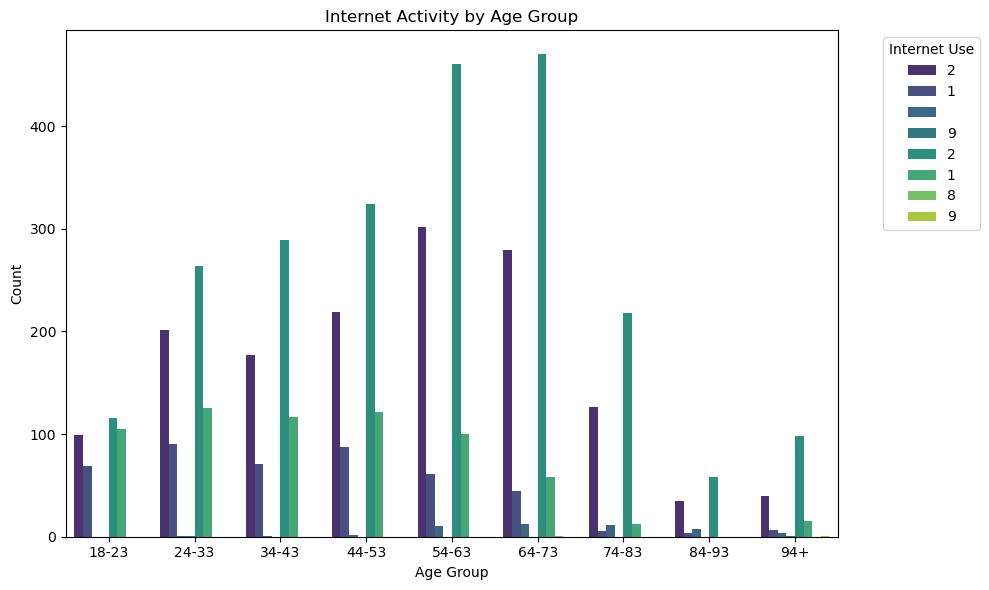

In [131]:
# Visualization: Age Group Technology Engagement
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='web1a', data=combined_data, palette='viridis')
plt.title('Internet Activity by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Internet Use', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

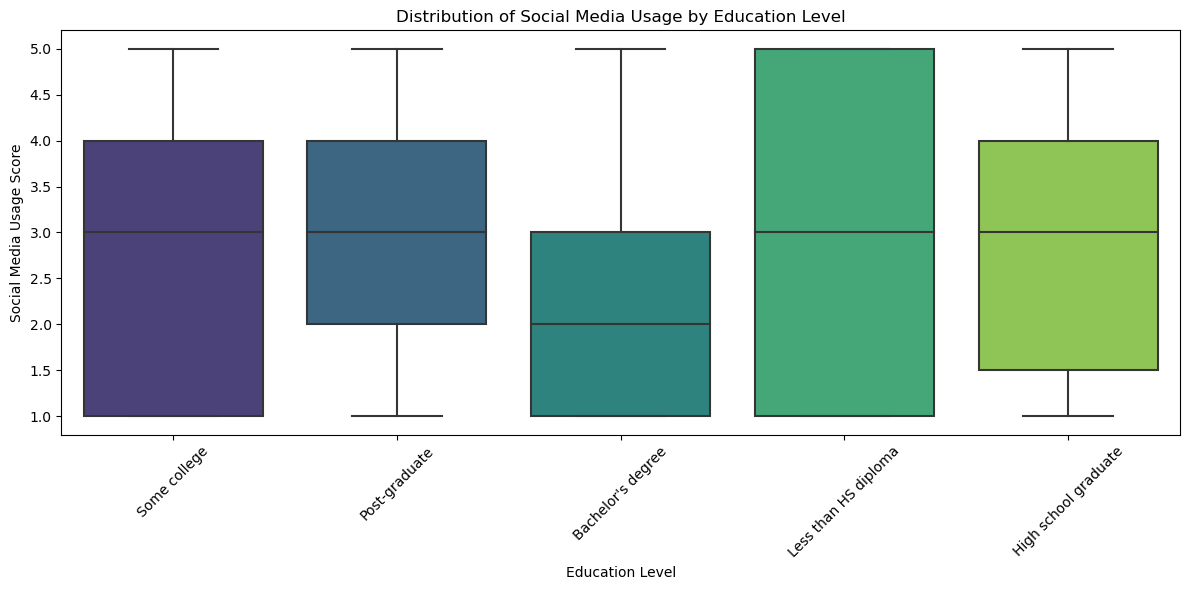

In [132]:
# # Visualization: Education Level and Technology Engagement
# plt.figure(figsize=(10, 6))
# sns.countplot(x='educ2', hue='sns2a', data=combined_data, palette='viridis')
# plt.title('Social Media Usage by Education Level')
# plt.xlabel('Education Level')
# plt.ylabel('Count')
# plt.legend(title='Social Media Use', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

education_level_mapping = {
    1: 'Less than HS diploma',
    2: 'High school graduate',
    3: 'Some college',
    4: 'Bachelor\'s degree',
    5: 'Post-graduate'
}
combined_data['Education Level'] = combined_data['educ2'].map(education_level_mapping)

# Mapping for social media usage categories to scores
social_media_usage_mapping = {
    ' ': 'Not specified', 
    '1': 'Never',
    '2': 'Rarely',
    '3': 'Occasionally',
    '4': 'Frequently',
    '5': 'Always',
    '8': 'Other',
    '9': 'Other' 
}

combined_data['Social Media Usage'] = combined_data['sns2a'].map(social_media_usage_mapping)


social_media_usage_scores = {
    'Not specified': np.nan,  
    'Never': 1,
    'Rarely': 2,
    'Occasionally': 3,
    'Frequently': 4,
    'Always': 5,
    'Other': np.nan 
}

# Apply the scores mapping
combined_data['Social Media Usage Score'] = combined_data['Social Media Usage'].map(social_media_usage_scores)

average_usage_by_education = (
    combined_data.dropna(subset=['Social Media Usage Score'])
    .groupby('Education Level')['Social Media Usage Score']
    .mean()
    .reset_index()
)

#plot the graph
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Education Level', y='Social Media Usage Score', data=average_usage_by_education, palette='viridis')
# plt.title('Average Social Media Usage by Education Level')
# plt.xlabel('Education Level')
# plt.ylabel('Average Social Media Usage Score')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education Level', y='Social Media Usage Score', data=combined_data, palette='viridis')
plt.title('Distribution of Social Media Usage by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Social Media Usage Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

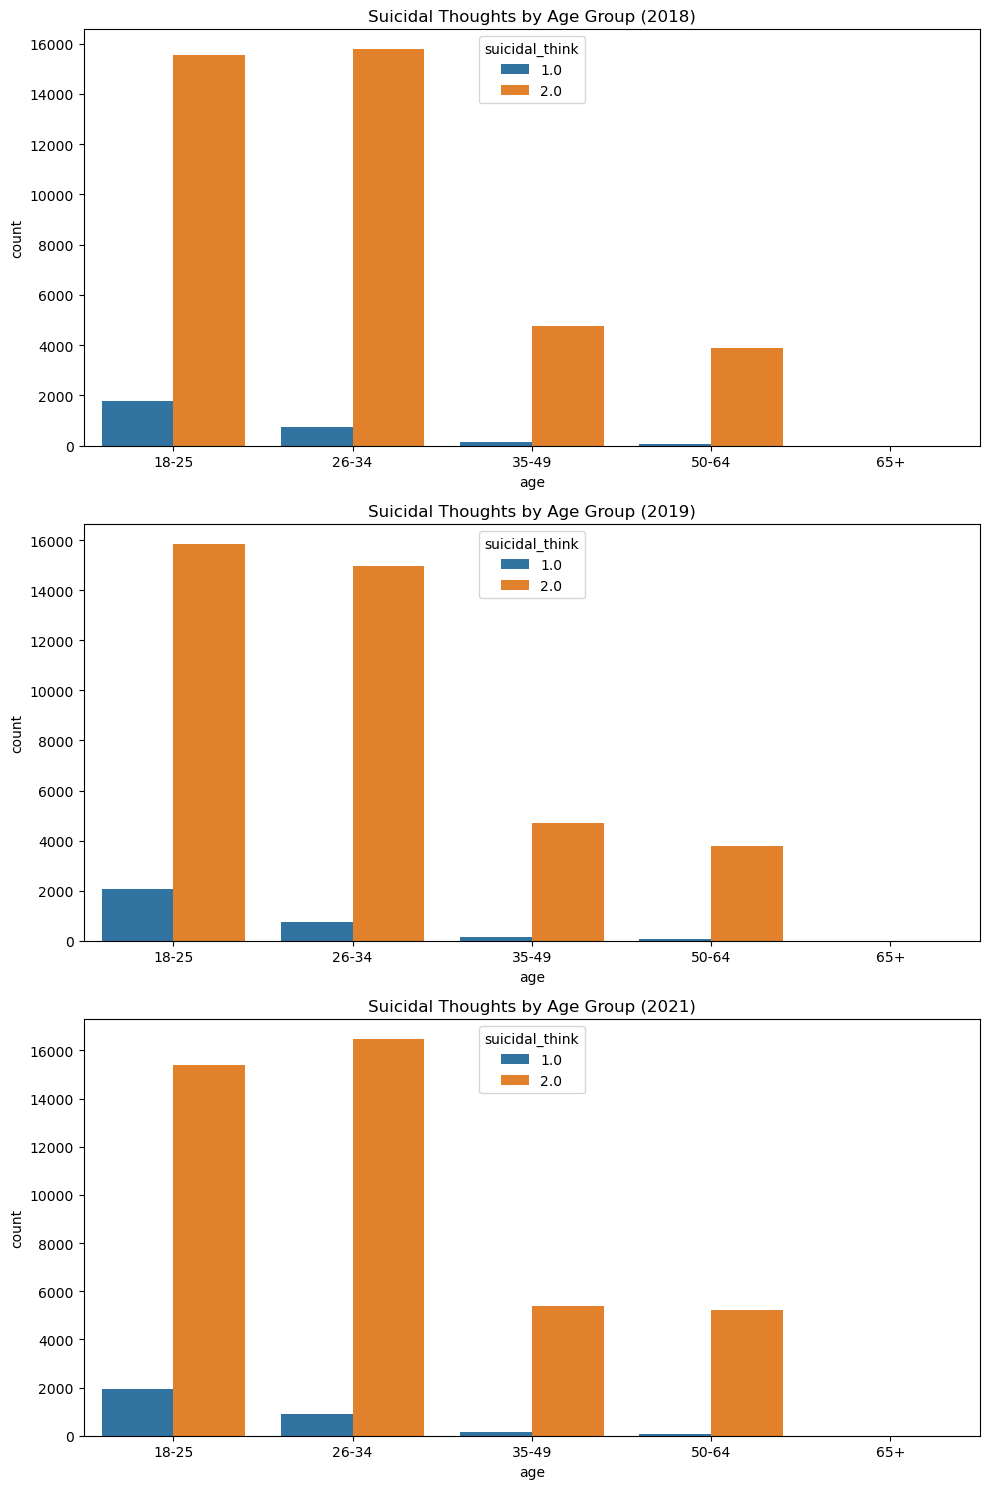

In [139]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot for NSDUH 2018
sns.countplot(x='age', hue='suicidal_think', data=NSDUH2018df, ax=axes[0])
axes[0].set_title('Suicidal Thoughts by Age Group (2018)')

# Plot for NSDUH 2019
sns.countplot(x='age', hue='suicidal_think', data=NSDUH2019df, ax=axes[1])
axes[1].set_title('Suicidal Thoughts by Age Group (2019)')

# Plot for NSDUH 2021
sns.countplot(x='age', hue='suicidal_think', data=NSDUH2021df, ax=axes[2])
axes[2].set_title('Suicidal Thoughts by Age Group (2021)')

# Adjust layout
plt.tight_layout()
plt.show()

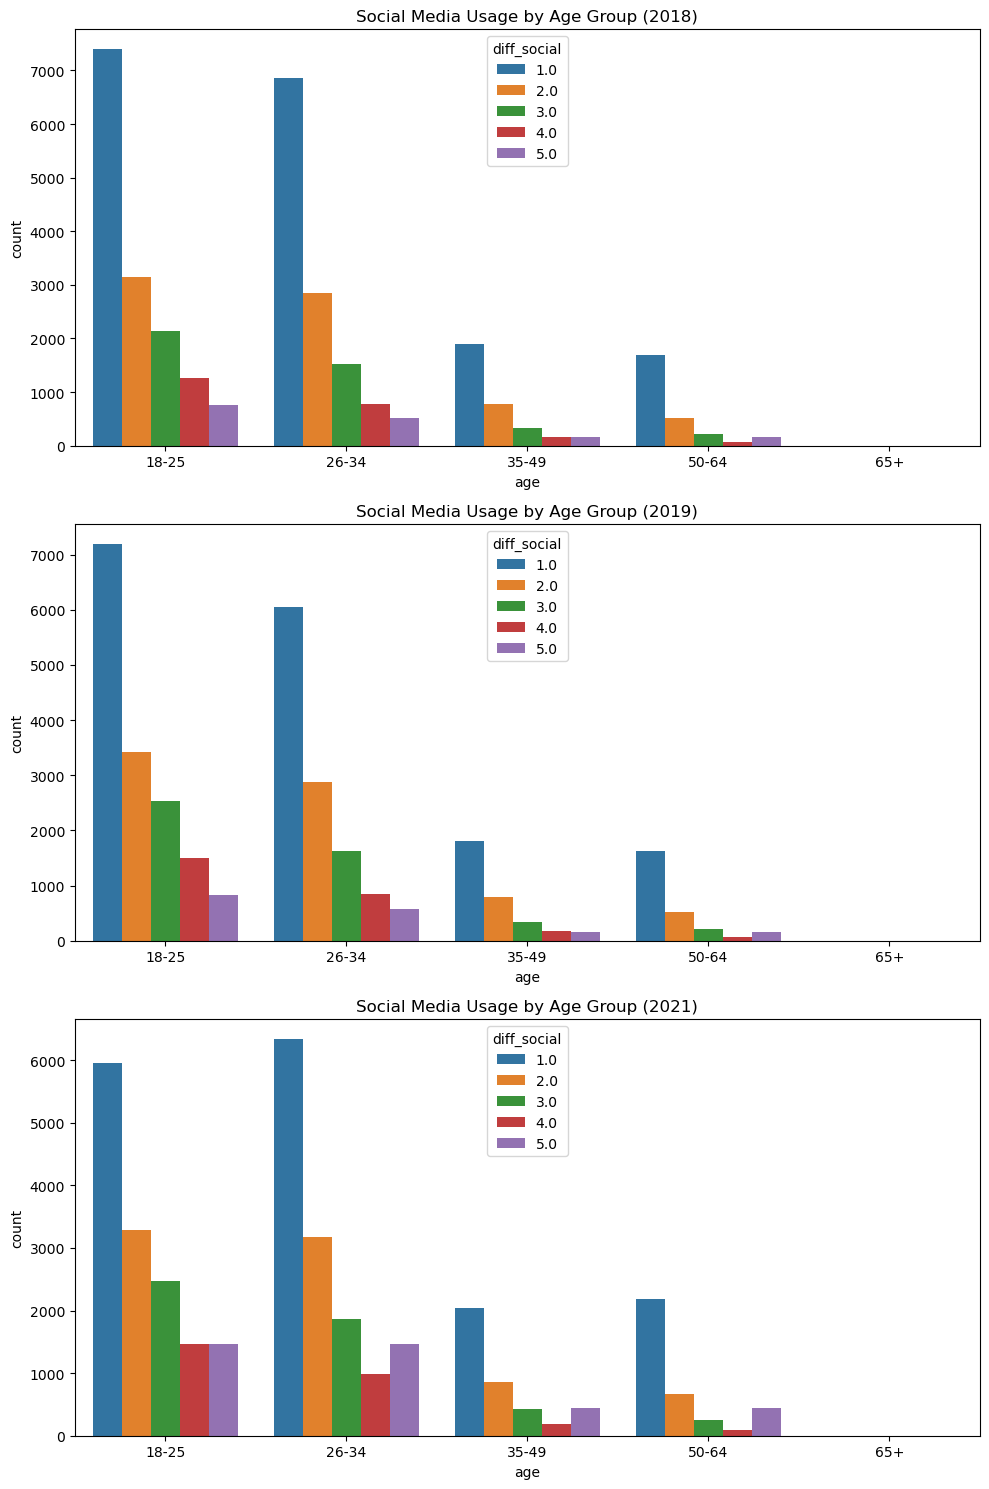

In [140]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot for NSDUH 2018
sns.countplot(x='age', hue='diff_social', data=NSDUH2018df, ax=axes[0])
axes[0].set_title('Social Media Usage by Age Group (2018)')

# Plot for NSDUH 2019
sns.countplot(x='age', hue='diff_social', data=NSDUH2019df, ax=axes[1])
axes[1].set_title('Social Media Usage by Age Group (2019)')

# Plot for NSDUH 2021
sns.countplot(x='age', hue='diff_social', data=NSDUH2021df, ax=axes[2])
axes[2].set_title('Social Media Usage by Age Group (2021)')

# Adjust layout
plt.tight_layout()
plt.show()

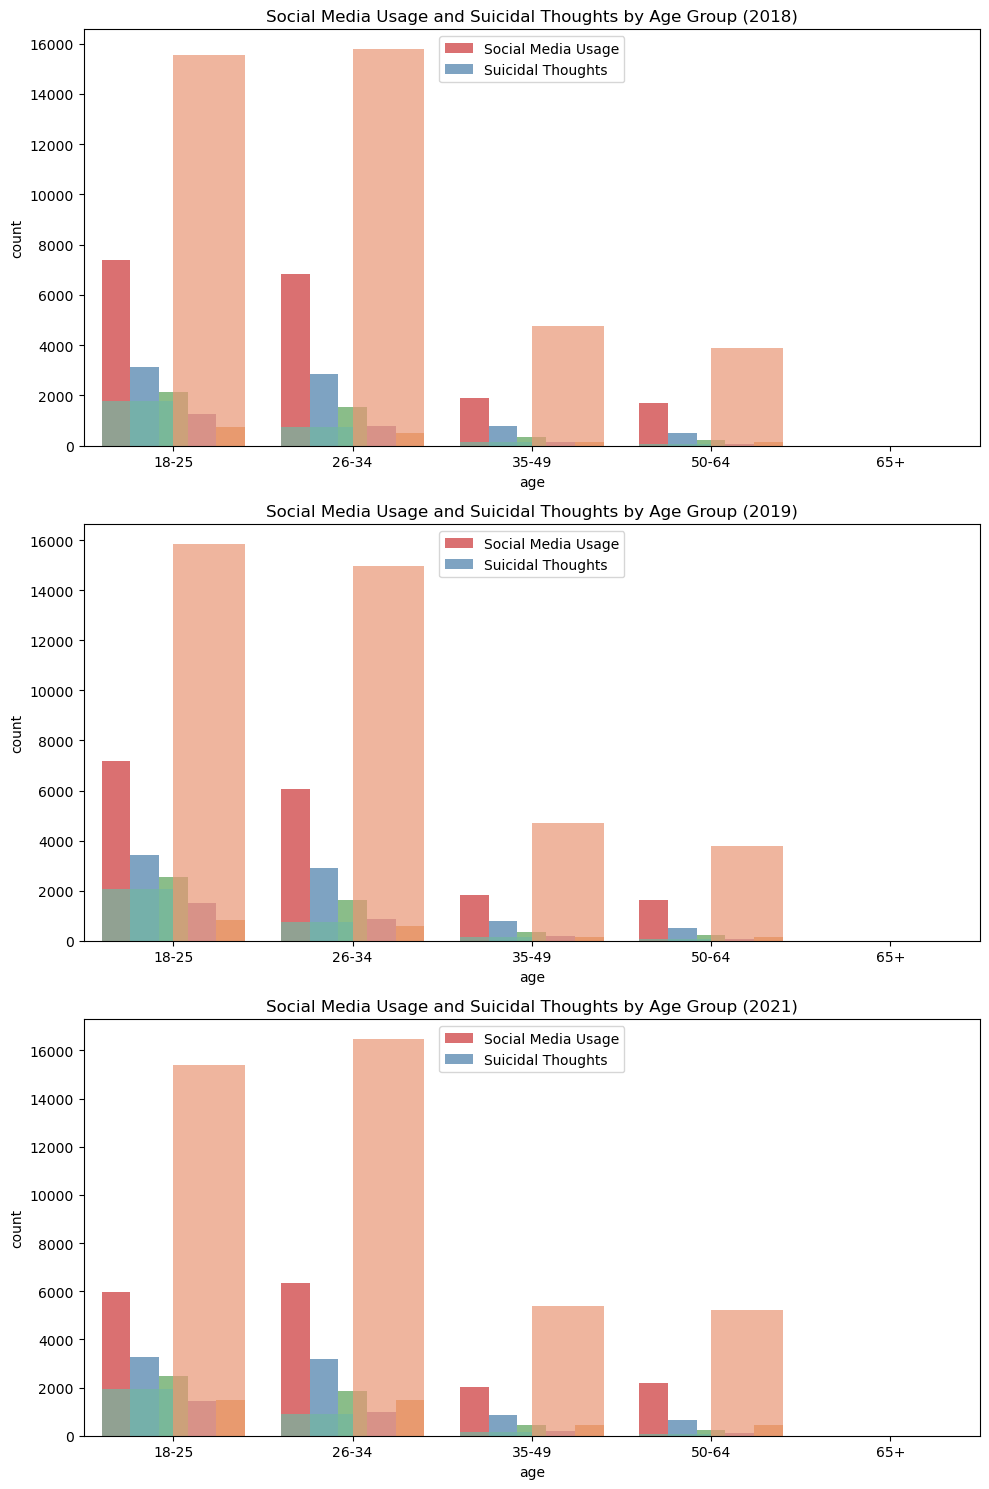

In [143]:
# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot for NSDUH 2018
sns.countplot(x='age', hue='diff_social', data=NSDUH2018df, ax=axes[0], palette='Set1', alpha=0.7)
sns.countplot(x='age', hue='suicidal_think', data=NSDUH2018df, ax=axes[0], palette='Set2', alpha=0.7)
axes[0].set_title('Social Media Usage and Suicidal Thoughts by Age Group (2018)')
axes[0].legend(['Social Media Usage', 'Suicidal Thoughts'])

# Plot for NSDUH 2019
sns.countplot(x='age', hue='diff_social', data=NSDUH2019df, ax=axes[1], palette='Set1', alpha=0.7)
sns.countplot(x='age', hue='suicidal_think', data=NSDUH2019df, ax=axes[1], palette='Set2', alpha=0.7)
axes[1].set_title('Social Media Usage and Suicidal Thoughts by Age Group (2019)')
axes[1].legend(['Social Media Usage', 'Suicidal Thoughts'])

# Plot for NSDUH 2021
sns.countplot(x='age', hue='diff_social', data=NSDUH2021df, ax=axes[2], palette='Set1', alpha=0.7)
sns.countplot(x='age', hue='suicidal_think', data=NSDUH2021df, ax=axes[2], palette='Set2', alpha=0.7)
axes[2].set_title('Social Media Usage and Suicidal Thoughts by Age Group (2021)')
axes[2].legend(['Social Media Usage', 'Suicidal Thoughts'])

# Adjust layout
plt.tight_layout()
plt.show()